In [1]:
# Dependencies
import os
import csv
import json
import time
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from pprint import pprint
from config import api_key
from citipy import citipy
import matplotlib.pyplot as plt

output_csv = os.path.join("../Resources","")
output_dir = os.path.join("../Figures","")

In [2]:
## Create latitudes and cities lists variables and initialize them as empty lists
cities = []
# Generate a list of cities using a random function up to 1500 in size for scanning
# Note: larger number of cities can be obtained with larger size, however for this task only about 500 are required
latitude = np.random.uniform(low=-90.000, high=90.000, size=2000)
longitude = np.random.uniform(low=-180.000, high=180.000, size=2000)

latitudes_longitudes = zip(latitude, longitude)
count_cities_500 = 0
for latitude_longitude in latitudes_longitudes:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    # If city is not in cities, then append the city to the cities' list. Limit the city list to 500
    if city not in cities:
        if count_cities_500 < 600:
            cities.append(city)
            count_cities_500 += 1
        else:
            break
    else:
        continue
print(f"First five are listed here: {cities[:5]}...")
print(f"Total number of cities is limited to {len(cities)}")

First five are listed here: ['domoni', 'nizhneyansk', 'honiara', 'richards bay', 'hailey']...
Total number of cities is limited to 600


In [3]:
# url for weather api
units = 'english'
url   = "http://api.openweathermap.org/data/2.5/weather?q="
url2  = "http://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units=metric"
city_5_list      = cities[:5]
city_list        = []
temp_list        = []
lat_list         = []
long_list        = []
humid_list       = []
cloud_list       = []
wind_list        = []
city_id_list     = []
counter          = 0 # Use this counter to limit amount of calls without sleep
city_id          = 0 # Unique City Identifier number
total_city_count = 1 # Total count for the cities fetched
for city in cities:
    try:
        if counter < 50:
            query_test_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
            response = requests.get(query_test_url).json()
            city_list.append(response["name"])
            city_id = response["id"]
            city_id_list.append(response["id"])
            print(f"| #{total_city_count}: City {city.capitalize()} with ID ({city_id}) is found.")
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            counter = counter + 1
            total_city_count = total_city_count + 1
        else:
            counter = 0
            time.sleep(2) # sleep for 2 seconds before restarting calling weather API
            print(f"********** Reset counter and wait for 2 seconds **********")
            city_id = response["id"]
            city_id_list.append(response["id"])
            city_list.append(response["name"])
            print(f"| #{total_city_count}: City {city.capitalize()} with ID ({city_id}) is found.")
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            total_city_count = total_city_count + 1
            continue
    except KeyError:
        print(f"City '{city.capitalize()}' was not found.")
print("=========================================")
print("Fetching data completed")
print("=========================================")

| #1: City Domoni with ID (921906) is found.
City 'Nizhneyansk' was not found.
| #2: City Honiara with ID (2108502) is found.
| #3: City Richards bay with ID (962367) is found.
| #4: City Hailey with ID (5594956) is found.
| #5: City Jamestown with ID (5122534) is found.
| #6: City Margate with ID (2643044) is found.
| #7: City Trinidad with ID (3902377) is found.
| #8: City East london with ID (1006984) is found.
| #9: City Benguela with ID (3351663) is found.
| #10: City Arraial do cabo with ID (3471451) is found.
| #11: City Aktau with ID (610612) is found.
| #12: City Hithadhoo with ID (1282256) is found.
| #13: City Ribeira grande with ID (3372707) is found.
| #14: City Ponta do sol with ID (2264557) is found.
| #15: City Mataura with ID (6201424) is found.
City 'Kamenskoye' was not found.
| #16: City Cape town with ID (3369157) is found.
| #17: City Albany with ID (5106841) is found.
| #18: City Avarua with ID (4035715) is found.
| #19: City Iwanai with ID (2129868) is found.
| #

| #155: City Pontalina with ID (3453158) is found.
| #156: City Buala with ID (2109528) is found.
| #157: City Inhambane with ID (1045114) is found.
| #158: City Mier with ID (3523222) is found.
| #159: City Luganville with ID (2136150) is found.
| #160: City Zabid with ID (69500) is found.
| #161: City Nipawin with ID (6088469) is found.
| #162: City Ust-kut with ID (2013923) is found.
| #163: City Qaanaaq with ID (3831208) is found.
| #164: City Alofi with ID (4036284) is found.
| #165: City Carmen with ID (3530599) is found.
City 'Tsihombe' was not found.
| #166: City Cockburn town with ID (3576994) is found.
| #167: City Saint-louis with ID (2246451) is found.
| #168: City Luderitz with ID (3355672) is found.
| #169: City Flin flon with ID (5954718) is found.
| #170: City Tautira with ID (4033557) is found.
| #171: City Dikson with ID (1507390) is found.
| #172: City Port hardy with ID (6111862) is found.
| #173: City Tasiilaq with ID (3424607) is found.
| #174: City Lebu with ID (

| #308: City Ha tinh with ID (1581047) is found.
| #309: City Choma with ID (917748) is found.
City 'Cumaribo' was not found.
| #310: City Kuybysheve with ID (703494) is found.
| #311: City San juan with ID (3837213) is found.
| #312: City Krasnoselkup with ID (1502073) is found.
| #313: City Kamyshlov with ID (1504769) is found.
| #314: City Daru with ID (2098329) is found.
| #315: City Yar-sale with ID (1486321) is found.
| #316: City Dzitbalche with ID (3529650) is found.
| #317: City Fortuna with ID (5563839) is found.
| #318: City Ampanihy with ID (1078553) is found.
| #319: City Coahuayana with ID (4013679) is found.
City 'Saleaula' was not found.
| #320: City Lazaro cardenas with ID (4026082) is found.
| #321: City Arucas with ID (2521519) is found.
| #322: City Krasnoarmeysk with ID (542464) is found.
| #323: City Nangomba with ID (877597) is found.
| #324: City Yalutorovsk with ID (1486468) is found.
| #325: City Carroll with ID (4350461) is found.
| #326: City Altenstadt with

| #460: City Wamba with ID (2319257) is found.
| #461: City Log with ID (534538) is found.
| #462: City Pedregulho with ID (3454408) is found.
| #463: City Huarmey with ID (3939168) is found.
| #464: City San jose with ID (5392171) is found.
| #465: City Stokmarknes with ID (3136690) is found.
City 'Matsanga' was not found.
| #466: City Vrangel with ID (2013258) is found.
| #467: City Botwood with ID (5906229) is found.
City 'Artyk' was not found.
| #468: City Kargasok with ID (1504382) is found.
| #469: City Ruteng with ID (1629380) is found.
City 'Meyungs' was not found.
City 'Haibowan' was not found.
| #470: City Santa helena de goias with ID (3450206) is found.
| #471: City Ohara with ID (2111495) is found.
| #472: City Kutum with ID (371745) is found.
| #473: City Nieuw amsterdam with ID (3383434) is found.
| #474: City Samana with ID (3492997) is found.
| #475: City Koeru with ID (591276) is found.
| #476: City Camacha with ID (2270385) is found.
| #477: City Hambantota with ID (

In [4]:
print(f"There are {len(cities)} cities in the 'cities' list.")

There are 600 cities in the 'cities' list.


In [5]:
# Create a dataframe from the collected data
weather_df = pd.DataFrame({'City': city_list,
                           'Temperature (DegF)': temp_list,
                           'Cloudiness (%)': cloud_list,
                           'Latitude': lat_list,
                           'Longitude': long_list,
                           'Humidity (%)': humid_list,
                           'Wind Speed (mps)': wind_list})
weather_df.to_csv(f"{output_csv} weather_data.csv", index = False)
weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Domoni,298.30,65,-12.26,44.53,70,6.84
1,Honiara,306.15,20,-9.43,159.95,66,5.10
2,Richards Bay,285.06,0,-28.78,32.04,54,2.38
3,Hailey,286.15,40,43.52,-114.32,54,4.60
4,Jamestown,283.96,1,42.10,-79.24,50,4.10


In [6]:
# Extract data for the northern hemisphere
northern_weather_df = weather_df.loc[weather_df['Latitude'] >= 0]
northern_weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
3,Hailey,286.15,40,43.52,-114.32,54,4.60
4,Jamestown,283.96,1,42.10,-79.24,50,4.10
5,Margate,287.96,8,51.38,1.39,90,0.89
10,Aktau,300.15,1,43.65,51.20,19,3.00
12,Ribeira Grande,289.39,18,38.52,-28.70,73,6.54


In [7]:
# Extract data for the southern hemisphere
southern_weather_df = weather_df.loc[weather_df['Latitude'] < 0]
southern_weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Domoni,298.30,65,-12.26,44.53,70,6.84
1,Honiara,306.15,20,-9.43,159.95,66,5.10
2,Richards Bay,285.06,0,-28.78,32.04,54,2.38
6,La Santisima Trinidad,295.01,61,-14.83,-64.90,84,4.47
7,East London,286.63,87,-33.02,27.91,35,2.63


In [8]:
# Extract column data to use for a scatter plot
temp_north  = northern_weather_df['Temperature (DegF)']
humid_north = northern_weather_df['Humidity (%)']
cloud_north = northern_weather_df['Cloudiness (%)']
wind_north  = northern_weather_df['Wind Speed (mps)']
lat_north   = northern_weather_df['Latitude']

print(cloud_north[:5])

3     40
4      1
5      8
10     1
12    18
Name: Cloudiness (%), dtype: int64


In [9]:
# Extract data for the Southern hemisphere
temp_south  = southern_weather_df['Temperature (DegF)']
humid_south = southern_weather_df['Humidity (%)']
cloud_south = southern_weather_df['Cloudiness (%)']
wind_south  = southern_weather_df['Wind Speed (mps)']
lat_south   = southern_weather_df['Latitude']

print(cloud_south[:5])

0    65
1    20
2     0
6    61
7    87
Name: Cloudiness (%), dtype: int64


In [10]:
def plot_linear_regression(y_axis, x_axis, title, ylabel, xlabel):
    # Plot temperature vs. latitude for the Northern hemisphere
    plt.scatter(x_axis, y_axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    m, b = np.polyfit(x_axis, y_axis, 1)
    plt.plot(x_axis, m*x_axis + b)
    plt.savefig(f"Figures/{title}.png")
    plt.show()
    # Identify Pearson value
    print(f"Pearson's correlation is = {round(sts.pearsonr(x_axis, y_axis)[0],2)} ({title}).")
#plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear positive correlation between the temperature and the latitude.
This relationship shows that with the latitude approaching 0 deg, which is an equator, 
the temperature is increasing.



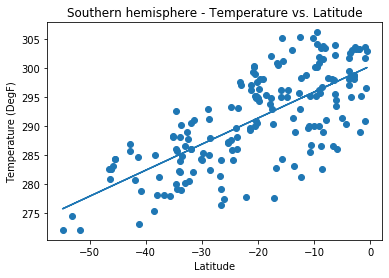

Pearson's correlation is = 0.72 (Southern hemisphere - Temperature vs. Latitude).


In [11]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear positive correlation between the temperature and the latitude.
This relationship shows that with the latitude approaching 0 deg, which is an equator, 
the temperature is increasing.
''')
plot_linear_regression(temp_south, lat_south, "Southern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear negative correlation between the temperature and the latitude.
This relationship shows that with the latitude moving from 0 deg to the north pole, 
the temperature is decreasing.



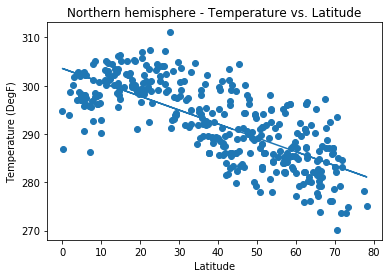

Pearson's correlation is = -0.74 (Northern hemisphere - Temperature vs. Latitude).


In [12]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear negative correlation between the temperature and the latitude.
This relationship shows that with the latitude moving from 0 deg to the north pole, 
the temperature is decreasing.
''')
plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average cloudiness is about 38%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more sunny days, - with 0% cloudiness. 



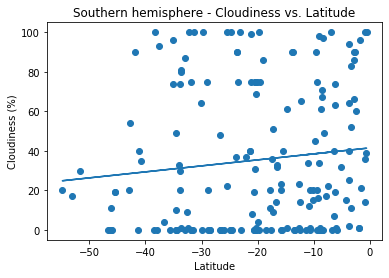

Pearson's correlation is = 0.11 (Southern hemisphere - Cloudiness vs. Latitude).


In [13]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average cloudiness is about 38%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more sunny days, - with 0% cloudiness. 
''')
plot_linear_regression(cloud_south, lat_south, "Southern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average cloudiness is about 45%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more days that are located on the 0 and 100% readings. 



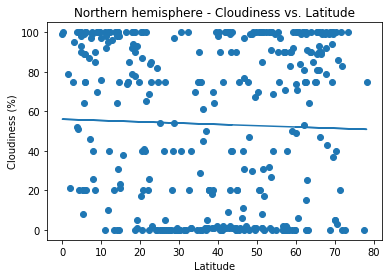

Pearson's correlation is = -0.03 (Northern hemisphere - Cloudiness vs. Latitude).


In [14]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average cloudiness is about 45%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more days that are located on the 0 and 100% readings. 
''')
plot_linear_regression(cloud_north, lat_north, "Northern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")


 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average humidity is about 70%.
When looking at the plot there is no clear correlation.
Humidity is quite high throughout the southern hemisphere



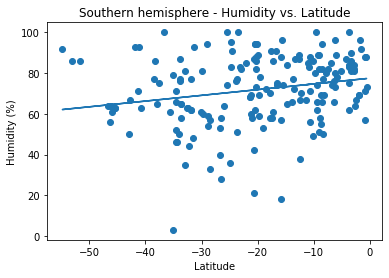

Pearson's correlation is = 0.22 (Southern hemisphere - Humidity vs. Latitude).


In [15]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average humidity is about 70%.
When looking at the plot there is no clear correlation.
Humidity is quite high throughout the southern hemisphere
''')
plot_linear_regression(humid_south, lat_south, "Southern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average humidity is about 65%.
When looking at the plot, there is no clear correlation.
The humidity seems to be more evenly spread in the latitude range between 15 and 40 degrees. 



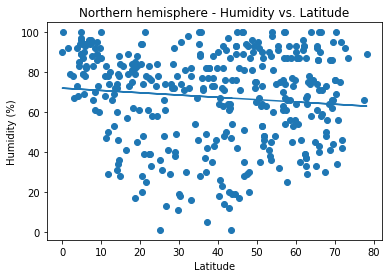

Pearson's correlation is = -0.1 (Northern hemisphere - Humidity vs. Latitude).


In [16]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average humidity is about 65%.
When looking at the plot, there is no clear correlation.
The humidity seems to be more evenly spread in the latitude range between 15 and 40 degrees. 
''')
plot_linear_regression(humid_north, lat_north, "Northern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average wind speed is about 3.3mps.
There are few days where the winds are stronger close to the equator.



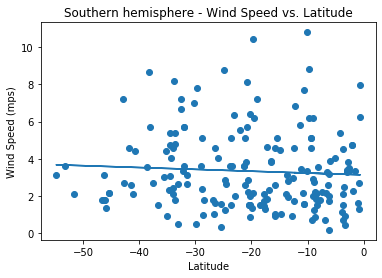

Pearson's correlation is = -0.06 (Southern hemisphere - Wind Speed vs. Latitude).


In [17]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average wind speed is about 3.3mps.
There are few days where the winds are stronger close to the equator.
''')
plot_linear_regression(wind_south, lat_south, "Southern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average wind speed is about 3.8%, 
which is slightly higher than in the Southern hemisphere.



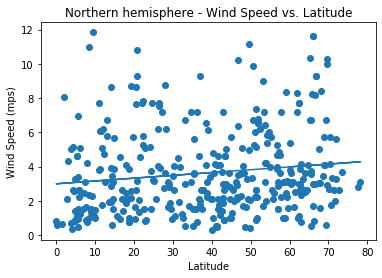

Pearson's correlation is = 0.14 (Northern hemisphere - Wind Speed vs. Latitude).


In [18]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average wind speed is about 3.8%, 
which is slightly higher than in the Southern hemisphere.
''')
plot_linear_regression(wind_north, lat_north, "Northern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")